# Assignment 5 for OpenMMLab Camp 2 2023
## MMagic

By Yuming Liu @jercylew
Updated: 2023/6/16

# 0. Env setup


Keep using the drive disk, the data, config, and source are located in google drive, so mound the google drive each time run this notebook

In [1]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Now enter the workspace in google drive
import os
os.chdir('/content/drive/MyDrive/workspace')
!pwd

/content/drive/MyDrive/workspace


Install dependencies

In [3]:
# Upgrade numpy
# Trick for upgrading numpy, fuck ^_^
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Pytorch
!pip install install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [6]:
# MMCV via MIM
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0rc3'
!mim install "mmdet>=3.0.0rc6"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
  Using cached mmcv-2.0.0rc3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: mmcv
    Found existing installation: mmcv 2.0.0
    Uninstalling mmcv-2.0.0:
      Successfully uninstalled mmcv-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.0.0 requires mmcv<2.1.0,>=2.0.0rc4, but you have mmcv 2.0.0rc3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-py

In [7]:
# Other necessary packages
!pip install opencv-python pillow matplotlib seaborn tqdm pycocotools pytorch-lightning -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install clip transformers gradio 'httpx[socks]' diffusers==0.14.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Environment check and display
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet

# 环境信息收集和打印
def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.8, V11.8.89
GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.1+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-

# 1. Download mmagic source

In [ ]:
os.chdir('/content/drive/MyDrive/workspace')
!pwd
!git clone https://github.com/open-mmlab/mmagic.git

/content/drive/MyDrive/workspace
Cloning into 'mmagic'...
remote: Enumerating objects: 25648, done.
remote: Counting objects: 100% (3612/3612), done.
remote: Compressing objects: 100% (1571/1571), done.
remote: Total 25648 (delta 2023), reused 3216 (delta 1988), pack-reused 22036
Receiving objects: 100% (25648/25648), 21.60 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (17181/17181), done.
Updating files: 100% (1535/1535), done.


In [9]:
import os
os.chdir('mmagic')
!pwd

/content/drive/MyDrive/workspace/mmagic


Create necessary directoreis to prepare for training models

In [ ]:
import os

os.mkdir('checkpoint')
os.mkdir('outputs')
os.mkdir('data')

# 2. Install MMagic

In [10]:
!mim install -v -e .

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Obtaining file:///content/drive/MyDrive/workspace/mmagic
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/dist.py:519: InformationOnly: Normalizing '1.0.2dev0' to '1.0.2.dev0'
    self.metadata.version = self._normalize_version(
  running egg_info
  creating /tmp/pip-pip-egg-info-4i7v01ii/mmagic.egg-info
  writing /tmp/pip-pip-egg-info-4i7v01ii/mmagic.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-4i7v01ii/mmagic.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-4i7v01ii/mmagic.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-4i7v01ii/mmagic.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg

# 3. Check the installation

In [11]:
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu118
CUDA 是否可用 True


In [12]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.8
编译器版本 GCC 9.3


In [13]:
# 检查 mmagic
import mmagic
print('MMagic版本', mmagic.__version__)

MMagic版本 1.0.2dev0


# 4. Matplotlib Chinese support

In [14]:
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /content/drive/MyDrive/workspace/SimHei.ttf

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('/content/drive/MyDrive/workspace/SimHei.ttf')
mpl.rc('font', family='SimHei')

!pwd

/content/drive/MyDrive/workspace/mmagic


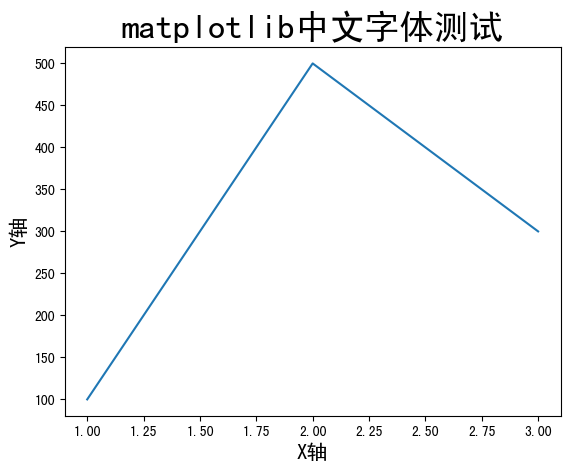

In [15]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 5. 黑白照片上色

In [16]:
os.chdir('/content/drive/MyDrive/workspace/mmagic')
!pwd

# Download the test image
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230613-MMagic/data/test_colorization.jpg -O data/test_colorization.jpg

# Inference
!python demo/mmagic_inference_demo.py \
        --model-name inst_colorization \
        --img data/test_colorization.jpg \
        --result-out-dir outputs/out_colorization.png

/content/drive/MyDrive/workspace/mmagic
--2023-06-18 05:47:00--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230613-MMagic/data/test_colorization.jpg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30466 (30K) [image/jpeg]
Saving to: ‘data/test_colorization.jpg’

data/test_colorizat 100%[===================>]  29.75K   108KB/s    in 0.3s    

2023-06-18 05:47:02 (108 KB/s) - ‘data/test_colorization.jpg’ saved [30466/30466]

2023-06-18 05:47:06.003118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with

# 6. Text to Image using Stable Diffusion

In [17]:
os.chdir('/content/drive/MyDrive/workspace/mmagic')
!pwd

/content/drive/MyDrive/workspace/mmagic


In [18]:
!pip uninstall numba
!pip install -U numba

Found existing installation: numba 0.56.4
Uninstalling numba-0.56.4:
  Would remove:
    /usr/local/bin/numba
    /usr/local/bin/pycc
    /usr/local/lib/python3.10/dist-packages/numba-0.56.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numba/*
Proceed (Y/n)? Y
  Successfully uninstalled numba-0.56.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1


In [20]:
from mmagic.apis import MMagicInferencer

# Load the diffusion model
sd_inferencer = MMagicInferencer(model_name='stable_diffusion')

text_prompts = 'A panda is having dinner at KFC'
text_prompts = 'A Persian cat walking in the streets of New York'

sd_inferencer.infer(text=text_prompts, result_out_dir='outputs/sd_res.png')

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 05:55:46 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


  0%|          | 0/50 [00:00<?, ?it/s]

({'infer_results': <PIL.Image.Image image mode=RGB size=512x512 at 0x7FF419731030>},
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FF419731030>)

# 11. Text to Image using DreamBooth

In [16]:
os.chdir('/content/drive/MyDrive/workspace/mmagic')
!pwd

/content/drive/MyDrive/workspace/mmagic


In [17]:
# Train the model
!bash tools/dist_train.sh configs/dreambooth/dreambooth-lora.py 1


/usr/local/lib/python3.10/dist-packages/torch/distributed/launch.py:181: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use-env is set by default in torchrun.
If your script expects `--local-rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/utils/dl_utils/setup_env.py:46: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/utils/dl_utils/setup_env.py:56: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overlo

In [16]:
# Do the inferencing using trained model
from mmengine import Config

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

In [18]:
cfg = Config.fromfile('configs/dreambooth/dreambooth-lora.py')
dreambooth_lora = MODELS.build(cfg.model)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 06:52:12 - mmengine - INFO - Set model dtype to 'torch.float16'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/18 06:52:36 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'
Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/18 06:52:37 - mmengine - INFO - Set VAE untrainable.
06/18 06:52:37 - mmengine - INFO - Move VAE to torch.float16.
06/18 06:52:37 - mmengine - INFO - Set Text Encoder untrainable.
06/18 06:52:37 - mmengine - INFO - Move Text Encoder to torch.float16.
06/18 06:52:37 - mmengine - INFO - Set Unet untrainable.
06/18 06:52:37 - mmengine - INFO - Set LoRA for 'model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q' with suffix match 'to_q'.
06/18 06:52:37 - mmengine - INFO - Set LoRA for 'model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k' with suffix match 'to_k'.
06/18 06:52:37 - mmengine - INFO - Set LoRA for 'model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v' with suffix match 'to_v'.
06/18 06:52:37 - mmengine - INFO - Set LoRA for 'model.down_blocks.0.attentions

In [20]:
state = torch.load('work_dirs/dreambooth-lora/iter_1000.pth')['state_dict']

FileNotFoundError: ignored

In [ ]:
def convert_state_dict(state):
    state_dict_new = {}
    for k, v in state.items():
        if '.module' in k:
            k_new = k.replace('.module', '')
        else:
            k_new = k
        if 'vae' in k:
            if 'to_q' in k:
                k_new = k.replace('to_q', 'query')
            elif 'to_k' in k:
                k_new = k.replace('to_k', 'key')
            elif 'to_v' in k:
                k_new = k.replace('to_v', 'value')
            elif 'to_out' in k:
                k_new = k.replace('to_out.0', 'proj_attn')
        state_dict_new[k_new] = v
    return state_dict_new

In [ ]:
dreambooth_lora.load_state_dict(convert_state_dict(state))
dreambooth_lora = dreambooth_lora.cuda()

In [ ]:
samples = dreambooth_lora.infer('side view of sks dog', guidance_scale=5)
samples['samples'][0]

In [ ]:
samples = dreambooth_lora.infer('ear close-up of sks dog', guidance_scale=5)
samples['samples'][0]

# 12. Image to Image using ControlNet-Canny

In [18]:
os.chdir('/content/drive/MyDrive/workspace/mmagic')
!pwd

/content/drive/MyDrive/workspace/mmagic


In [19]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

Load the ControlNet model

In [20]:
# !pip install accelerate
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

06/18 07:33:32 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/18 07:33:34 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'
Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/18 07:33:35 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


In [33]:
# control_url = 'https://user-images.githubusercontent.com/28132635/230288866-99603172-04cb-47b3-8adb-d1aa532d1d2c.jpg'
control_url = 'data/test_controlnet/rough_house_2.png'
control_img = mmcv.imread(control_url)
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
print(control.shape)
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)


(812, 1079, 1)


In [35]:
# 咒语
prompt = 'Room with white walls, an orange ceiling and golden floor.'

In [36]:
# Do the prediction
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'data/test_controlnet/sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'data/test_controlnet/control_{idx}.png')

100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


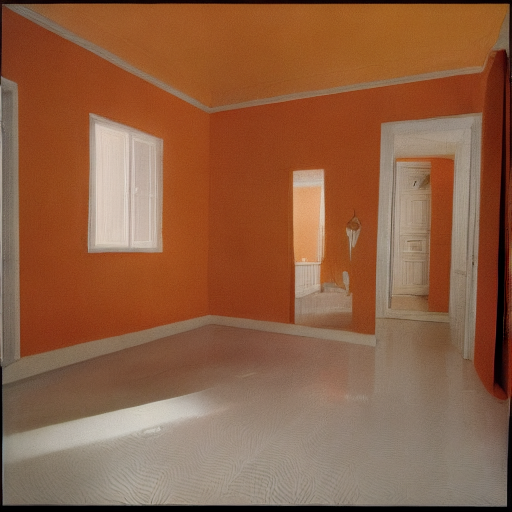

In [37]:
Image.open(f'data/test_controlnet/sample_0.png')

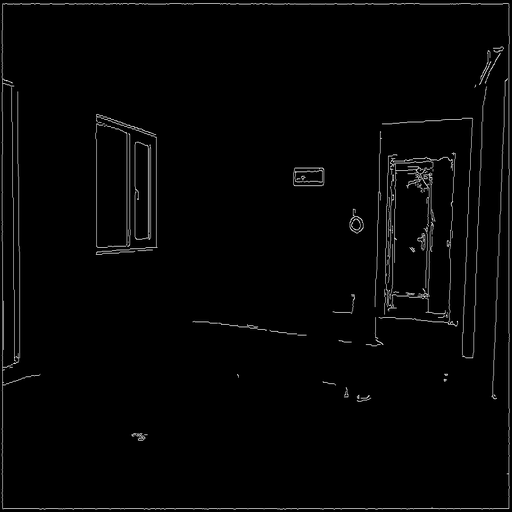

In [38]:
Image.open(f'data/test_controlnet/control_0.png')